In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d kaustubhb999/tomatoleaf

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Tomato-20230710T083740Z-001.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import os
# import random
# import shutil

# # Set the path for the train directory
# train = "/content/Tomato/train"

# # Create the validation directory in the same location as the train directory
# validation = os.path.join(os.path.dirname(train), "validation")

# # Create the test directory if it doesn't exist
# if not os.path.exists(validation):
#     os.makedirs(validation)

# # Get the list of files in the train directory
# train_files = os.listdir(train)

# # Iterate over each file in the train directory
# for file_name in train_files:
#     # Create the corresponding validation file
#     validation_file = os.path.join(validation, file_name)
#     os.makedirs(validation_file)

#     # Get the list of images in the train file
#     train_file_path = os.path.join(train, file_name)
#     train_images = os.listdir(train_file_path)

#     # Select 200 random images from the train file
#     # validation_images = random.sample(train_images, 200)

#     # Move the selected images to the validation file
#     for image_name in validation_images:
#         src_validation = os.path.join(train_file_path, image_name)
#         dst_validation = os.path.join(validation_file, image_name)
#         shutil.move(src_validation, dst_validation)

In [ ]:
# import os
# import shutil

# tomato_directory = '/content/Tomato'
# val_directory = os.path.join(tomato_directory, 'val')

# # Check if the 'val' directory exists
# if os.path.exists(val_directory) and os.path.isdir(val_directory):
#     # Delete the 'val' directory and its contents
#     # shutil.rmtree(val_directory)
#     print("The 'val' directory has been deleted.")
# else:
#     print("The 'val' directory does not exist.")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Tomato/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=64,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Tomato/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=64,
    image_size=(256,256)
)

Found 1854 files belonging to 10 classes.
Found 261 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import concatenate

# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu', input_shape=(256, 256, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Conv2D(80, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu', input_shape=(256, 256, 3)))

model.add(Conv2D(192, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))

# Define the inception module function
def inception_module(x, filters):
    branch1 = Conv2D(filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch1 = Conv2D(filters[1], kernel_size=(3, 3), padding='same', activation='relu')(branch1)

    branch2 = Conv2D(filters[2], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch2 = Conv2D(filters[3], kernel_size=(5, 5), padding='same', activation='relu')(branch2)

    branch3 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch3 = Conv2D(filters[4], kernel_size=(1, 1), padding='same', activation='relu')(branch3)

    branch4 = Conv2D(filters[5], kernel_size=(1, 1), padding='same', activation='relu')(x)

    concatenated = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return concatenated

inception = inception_module(model.output, filters=[64, 128, 128, 32, 32, 32])

model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 31, 31, 80)        5200      
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 192)       138432    
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=25,validation_data=validation_ds)

Epoch 1/25
29/29 [==============================] - 22s 207ms/step - loss: 4.7833 - accuracy: 0.2470 - val_loss: 1.6492 - val_accuracy: 0.3831
Epoch 2/25
29/29 [==============================] - 4s 112ms/step - loss: 1.3028 - accuracy: 0.5518 - val_loss: 1.1569 - val_accuracy: 0.5900
Epoch 3/25
29/29 [==============================] - 5s 158ms/step - loss: 0.8467 - accuracy: 0.7071 - val_loss: 1.1809 - val_accuracy: 0.6054
Epoch 4/25
29/29 [==============================] - 5s 149ms/step - loss: 0.6194 - accuracy: 0.7923 - val_loss: 0.8075 - val_accuracy: 0.7739
Epoch 5/25
29/29 [==============================] - 4s 113ms/step - loss: 0.5881 - accuracy: 0.7945 - val_loss: 0.8738 - val_accuracy: 0.7778
Epoch 6/25
29/29 [==============================] - 5s 164ms/step - loss: 0.3554 - accuracy: 0.8776 - val_loss: 0.8723 - val_accuracy: 0.7586
Epoch 7/25
29/29 [==============================] - 4s 128ms/step - loss: 0.2626 - accuracy: 0.9088 - val_loss: 0.9331 - val_accuracy: 0.7625
Epoch

In [ ]:
# generators
test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/Tomato/test",
    labels='inferred',
    label_mode = 'int',
    batch_size=128,
    image_size=(256,256)
)

Found 539 files belonging to 10 classes.


In [ ]:
test_directory = "/content/Tomato/test"

# Load and preprocess the test dataset

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 3s 181ms/step - loss: 1.7485 - accuracy: 0.7180
Test Loss: 1.7484816312789917
Test Accuracy: 0.7179962992668152


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
from glob import glob
from sklearn.metrics import roc_curve, auc
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from  matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate,Dense, Conv2D, MaxPooling2D, Flatten,Input,Activation,add,AveragePooling2D,BatchNormalization,Dropout
%matplotlib inline
import shutil
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

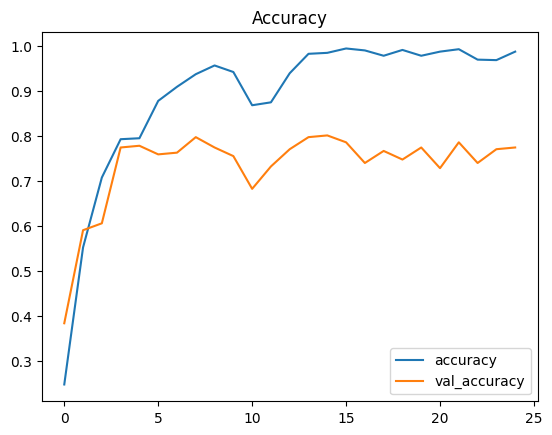

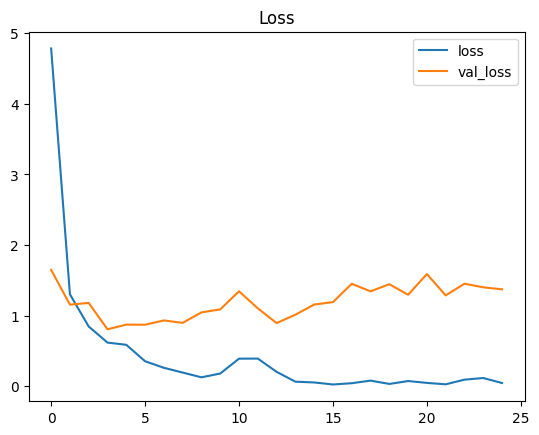

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

Found 539 files belonging to 10 classes.
5/5 [==============================] - 2s 107ms/step


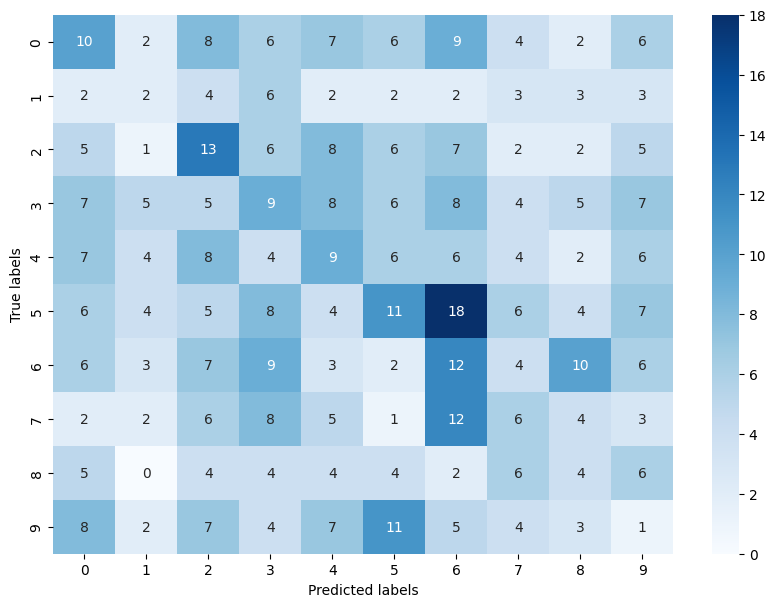

5/5 [==============================] - 2s 90ms/step - loss: 1.7485 - accuracy: 0.7180
Test Loss: 1.7484816312789917
Test Accuracy: 0.7179962992668152


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load and preprocess the test dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/tomato/test',
    labels='inferred',
    label_mode='int',
    batch_size=128,
    image_size=(256, 256)
)

# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(labels.numpy())

# Make predictions on the test dataset
test_predictions = model.predict(test_ds)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Define disease labels
disease_labels = ["Bacterial_spot", "Early_blight", "healthy", "Late_blight", "Leaf_Mold",
                  "Septoria_leaf_spot", "Spider_mites Two-spotted_spider_mite", "Target_Spot",
                  "Tomato_mosaic_virus", "Tomato_Yellow_Leaf_Curl_Virus"]

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the labels for x-axis and y-axis
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Set the tick labels for the x-axis and y-axis
plt.xticks(ticks=np.arange(len(disease_labels)), labels=disease_labels, rotation=90)
plt.yticks(ticks=np.arange(len(disease_labels)), labels=disease_labels)

plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Compute precision and F1 score
precision = precision_score(test_true_labels, test_predicted_labels, average='macro')
recall = recall_score(test_true_labels, test_predicted_labels, average='macro')
f1 = f1_score(test_true_labels, test_predicted_labels, average='macro')

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[10  2  8  6  7  6  9  4  2  6]
 [ 2  2  4  6  2  2  2  3  3  3]
 [ 5  1 13  6  8  6  7  2  2  5]
 [ 7  5  5  9  8  6  8  4  5  7]
 [ 7  4  8  4  9  6  6  4  2  6]
 [ 6  4  5  8  4 11 18  6  4  7]
 [ 6  3  7  9  3  2 12  4 10  6]
 [ 2  2  6  8  5  1 12  6  4  3]
 [ 5  0  4  4  4  4  2  6  4  6]
 [ 8  2  7  4  7 11  5  4  3  1]]
Precision: 0.13552105151250032
Recall: 0.13618122759763002
F1 Score: 0.13489112851366147


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/Tomato/test/Tomato___Late_blight/f843c76c-a7d4-4031-abe2-9245602fbb15___GHLB_PS Leaf 49.1 Day 18.jpg')

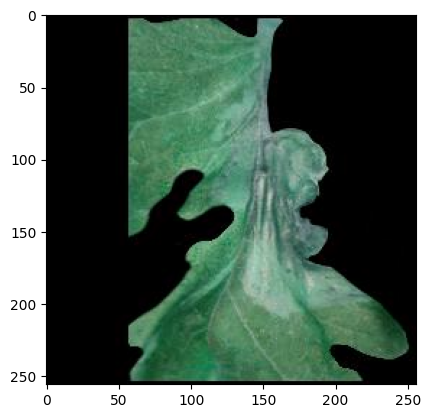

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.0000000e+00, 2.6490437e-35, 1.0000000e+00, 4.7834469e-25,
        0.0000000e+00, 2.2578412e-19, 2.0865878e-24, 0.0000000e+00,
        1.5242516e-33, 9.2386154e-31]], dtype=float32)

In [ ]:
output_array=model.predict(test_input)

In [ ]:
import numpy as np

disease_labels = ["Bacterial_spot", "Early_blight", "Late_blight", "Leaf_Mold", "Septoria_leaf_spot", "Spider_mites Two-spotted_spider_mite", "Target_Spot", "Tomato_mosaic_virus", "Tomato_Yellow_Leaf_Curl_Virus", "healthy"]

predicted_index = np.argmax(output_array)
predicted_label = disease_labels[predicted_index]

print("Predicted Label:", predicted_label)

Predicted Label: Leaf_Mold
